## Define Category

In [1]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

## Load data

In [2]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

## Data Transformation

In [3]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

### Adding Columns

In [4]:
# add category to the dataframe
X['category'] = twenty_train.target

In [5]:
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [6]:
#Answer here
X[['category', 'category_name']]

,category,category_name
0,1,comp.graphics
1,1,comp.graphics
2,3,soc.religion.christian
3,3,soc.religion.christian
4,3,soc.religion.christian
...,...,...
2252,2,sci.med
2253,2,sci.med
2254,2,sci.med
2255,2,sci.med


### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [7]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [8]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

### Answer

In isnull()'s document, it claims that only `numpy.NaN` and `None` get mapped to True.

Since `'NaN'` `'None'` `''` are actually strings, isnull() will return False.

In this case, we can add a new rule to detect the specific strings, and then apply on the series.

In [9]:
# Answer
NA_df['missing_example'].isnull() | NA_df['missing_example'].apply(lambda x: x in ['NaN', 'None', '']) 



0    True
1    True
2    True
3    True
4    True
5    True
Name: missing_example, dtype: bool

In [10]:
X_sample = X.sample(n=1000) #random state

### >>> Exercise 6 (take home):
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

### Answer
1. The order of `X_sample` is randomnized
2. `X_sameple` doesn't contain all datas, since they are randomly picked.

In [11]:
X_sample[:5]

,text,category,category_name
1927,From: peterbak@microsoft.com (Peter Bako) Subj...,1,comp.graphics
2128,From: ide!twelker@uunet.uu.net (Steve Twelker)...,3,soc.religion.christian
1793,From: rbutera@owlnet.rice.edu (Robert John But...,3,soc.religion.christian
105,From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...,0,alt.atheism
346,From: darice@yoyo.cc.monash.edu.au (Fred Rice)...,0,alt.atheism


In [12]:
# doesn't contain all datas
X_sample.sort_index()[:5]
 

,text,category,category_name
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med


### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

<AxesSubplot: title={'center': 'Category distribution'}>

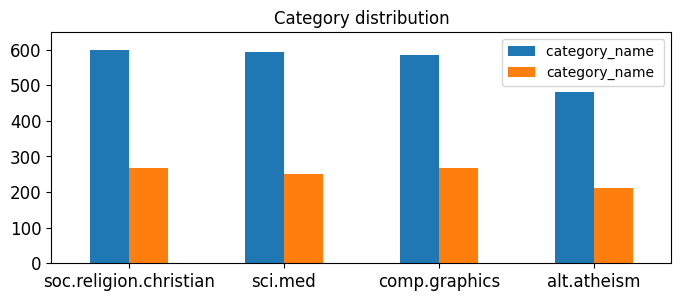

In [13]:
# Answer
upper_bound = max(X.category_name.value_counts() + 50) #276 + 50

a = X.category_name.value_counts().to_frame()
b = X_sample.category_name.value_counts().to_frame()
c = a.join(b, lsuffix=' ')
c.plot.bar(rot=0,
            title = 'Category distribution',
            ylim = [0, upper_bound], 
            fontsize = 12,
            width=0.5,
            figsize = (8,3)
)



In [14]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
count_vect.get_feature_names_out()[0]


'00'

In [15]:
# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [16]:
#Answer
# the second item in fifth row
ind = sorted(X_counts[0:5, 0:100][4].indices)[1]
count_vect.get_feature_names_out()[ind]


'01'

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

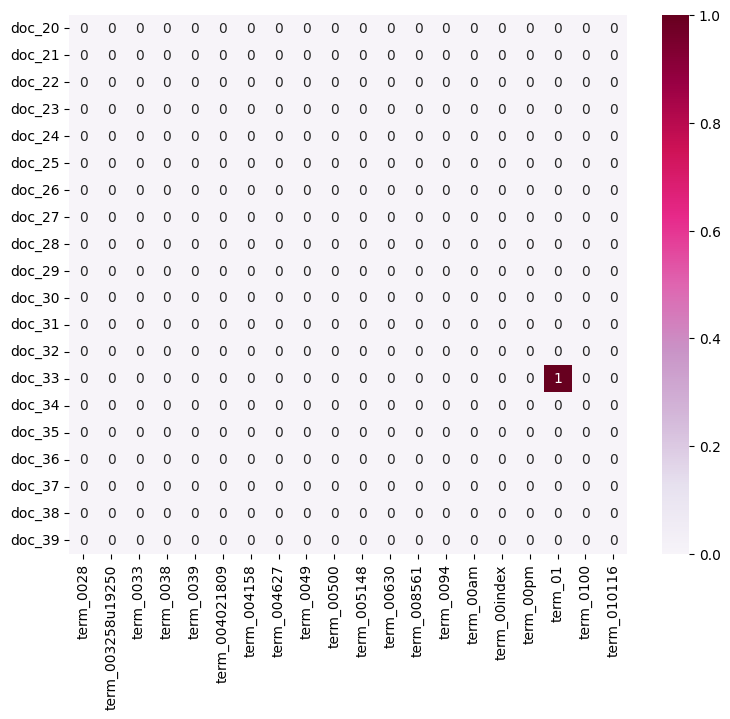

In [17]:
# Answer here
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
# Pack them into a function
#print(list(X.index)[1:10])
def draw_term_document_matrix(X_counts, rows, cols):
    # first twenty features only
    plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[cols]]
    #plot_x = ["term_"+str(count_vect.get_feature_names_out()[i]) for i in cols]
    # obtain document index
    plot_y = ["doc_"+ str(i) for i in list(X.index)[rows]]
    #plot_y = ["doc_"+ str(X.index[i]) for i in rows]
    plot_z = X_counts[rows, cols].toarray() #X_counts[how many documents, how many terms]
    df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
    plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(df_todraw,
                    cmap="PuRd",
                    vmin=0, vmax=1, annot=True)

#draw_term_document_matrix(X_counts, range(20,40), range(20,40))
#X_counts[slice(0,20), slice(0,20)]
draw_term_document_matrix(X_counts, slice(20,40),  slice(20,40))

In [18]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

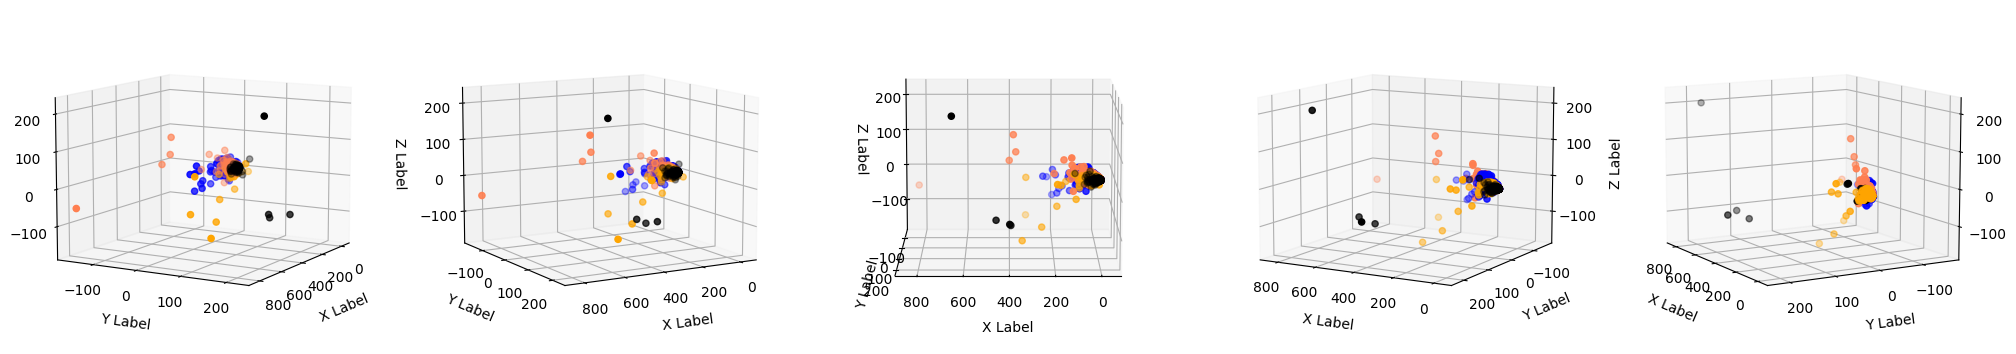

In [19]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import Axes3D
import time
%matplotlib inline
col = ['coral', 'blue', 'black', 'orange']


fig = plt.figure(figsize=(25,10))

#fig, axes = plt.subplots(1,3, projection = '3d')

for i in range(1,6):
    #fig, axes = plt.subplots(1,3,i, projection = '3d')
    ax = fig.add_subplot(1,5,i, projection = '3d')
    #ax = plt.axes(projection = '3d')
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        zs = X_reduced[X['category_name'] == category].T[2]
        ax.scatter(xs, ys, zs, c = c, marker='o')
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_xlabel('\nX Label')
    ax.set_ylabel('\nY Label')
    ax.set_zlabel('\nZ Label')
    ax.view_init(elev=10., azim=i*30)
plt.show()
   


### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [21]:
df_X_count = pd.DataFrame(X_counts.toarray(), columns=count_vect.get_feature_names_out())
term_frequencies = df_X_count.sum()

In [22]:
import plotly.express as px 
fig = px.bar(x=term_frequencies.index[:300], y=term_frequencies[:300])
fig.show()
# need to zoom in to see all lable

### >>> **Exercise 14 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [23]:
#answer
import plotly.express as px 

def show_volc(X_counts, cols):
    df_X_count = pd.DataFrame(X_counts[:,cols].toarray(), columns=count_vect.get_feature_names_out()[cols])
    term_frequencies = df_X_count.sum()
    fig = px.bar(x=term_frequencies.index, y=term_frequencies)
    fig.show()
# example
show_volc(X_counts, slice(0, 30))

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [25]:
def show_volc2(X_counts, cols):
    df_X_count = pd.DataFrame(X_counts.toarray(), columns=count_vect.get_feature_names_out())
    term_frequencies = df_X_count.sum().sort_values(ascending=False)
    fig = px.bar(x=term_frequencies.index[cols], y=term_frequencies[cols])
    fig.show()
# example
show_volc2(X_counts, slice(0, 50))

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [26]:
# Yes, need to change who to fit
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
X['bin_category'] = mlb.transform(X['category_name']).tolist()
X.head(10)

,text,category,category_name,bin_category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[0, 0, 1, 0]"
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med,"[0, 0, 1, 0]"


## End of Take home exercise